In [4]:
import classy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [5]:
%matplotlib notebook

In [6]:
common_pars = {'h':0.7135491,'omega_b':0.022723,'omega_cdm':0.128829,'ln10^{10}A_s':3.052802,'n_s':0.980163,'tau_reio':0.462192,
               'spinstat_wzdr':-1,'use_wzdr_PSD':'yes'}

In [8]:

cosmo = classy.Class()

cosmo.set(common_pars)
cosmo.set({'N_wzdr':0.5,'rg_wzdr':1.14285714286,'zt_wzdr':25118.8643151})

#cosmo.set({'tol_wzdr':1e-14})
cosmo.set({'wzdr_integration_method':1,'qsize_wzdr':5000,'qmax_wzdr':30.,'tol_wzdr':1e-15})
cosmo.compute()

bg = cosmo.get_background()
print(bg["(.)N_wzdr"][-1])


CosmoSevereError: 

Error in Class: Class did not read input parameter(s): spinstat_wzdr, use_wzdr_PSD, N_wzdr, rg_wzdr, zt_wzdr, wzdr_integration_method, qsize_wzdr, qmax_wzdr, tol_wzdr


<IPython.core.display.Javascript object>


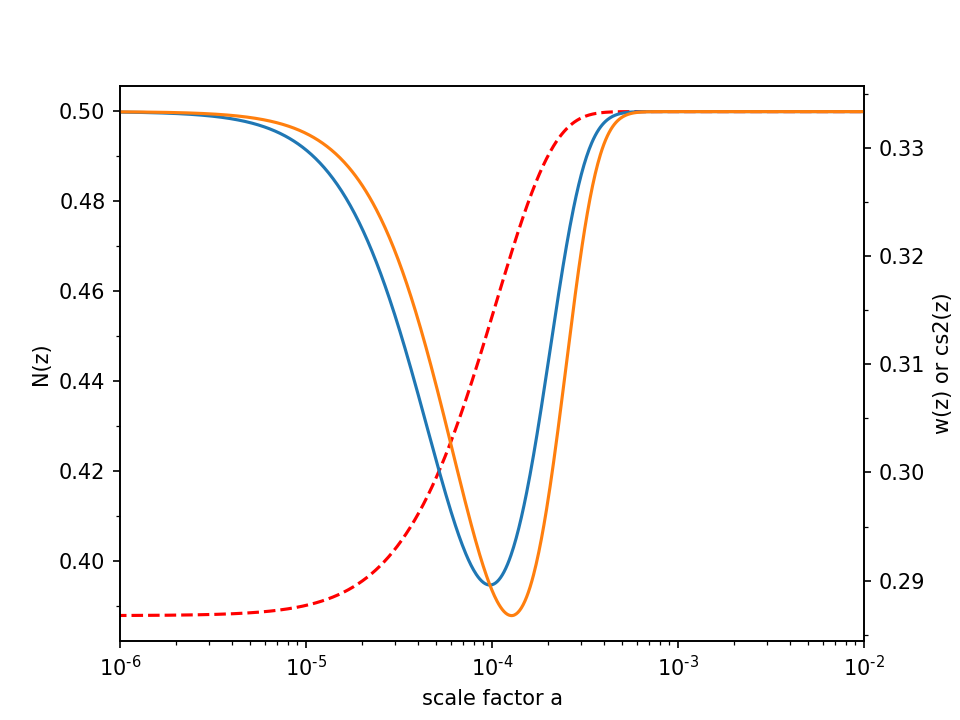

In [9]:
import matplotlib.ticker as plticker
plt.figure()
plt.semilogx(1./(1.+bg["z"]),bg["(.)N_wzdr"],color="red",linestyle="--")
plt.xlabel("scale factor a")
plt.ylabel("N(z)")
plt.xlim(1e-6,1e-2)

plt.gca().yaxis.set_minor_locator(plticker.MultipleLocator(base=0.01))
ax2 = plt.twinx()
ax2.semilogx(1./(1.+bg["z"]),bg["(.)w_wzdr"])
ax2.semilogx(1./(1.+bg["z"]),bg["(.)cs2_wzdr"])
ax2.set_ylabel("w(z) or cs2(z)")
ax2.yaxis.set_minor_locator(plticker.MultipleLocator(base=0.005))
#plt.loglog(1./(1.+bg["z"]),bg["(.)T_wzdr"]/bg["(.)T_wzdr"][0])
plt.savefig("fig1.pdf")
plt.show()

<IPython.core.display.Javascript object>


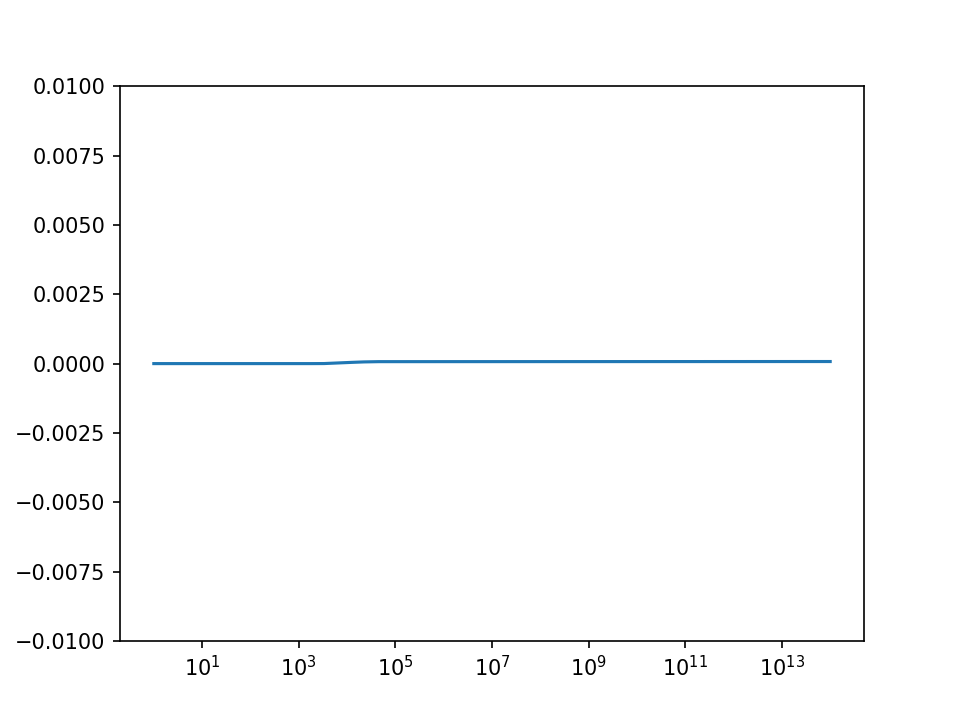

In [11]:
plt.figure()
a = 1./(1.+bg["z"])
S = (bg["(.)rho_wzdr"]+bg["(.)p_wzdr"])/bg['(.)T_wzdr']*a**4
plt.semilogx(1.+bg["z"],S/S[-1]-1)
plt.ylim(-0.01,0.01)
plt.show()

<IPython.core.display.Javascript object>


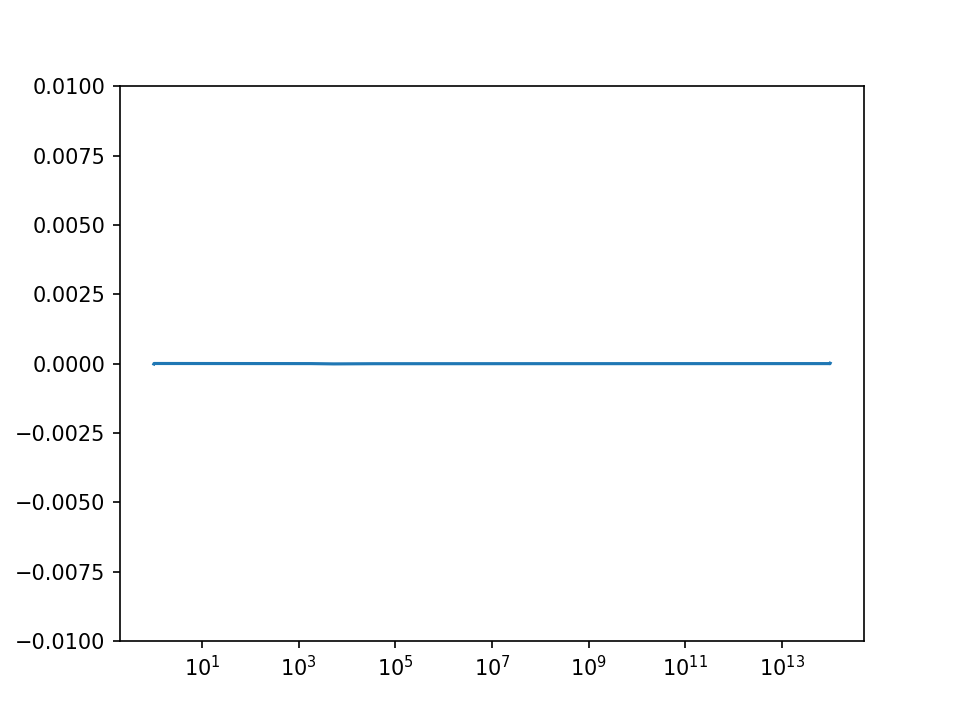

In [12]:
plt.figure()
#plt.loglog(1.+bg["z"],-bg["(.)drdlna_wzdr"]/(3.*(bg["(.)rho_wzdr"]+bg["(.)p_wzdr"])))
#plt.loglog(1.+bg["z"],-bg["(.)drdlna_wzdr"]/(3.*(bg["(.)rho_wzdr"]+bg["(.)p_wzdr"])))
plt.semilogx(1.+bg["z"],bg["(.)drdlna_wzdr"]/CubicSpline(np.log(a),bg["(.)rho_wzdr"]).derivative()(np.log(a))-1)
plt.ylim(-0.01,0.01)
plt.show()

<IPython.core.display.Javascript object>


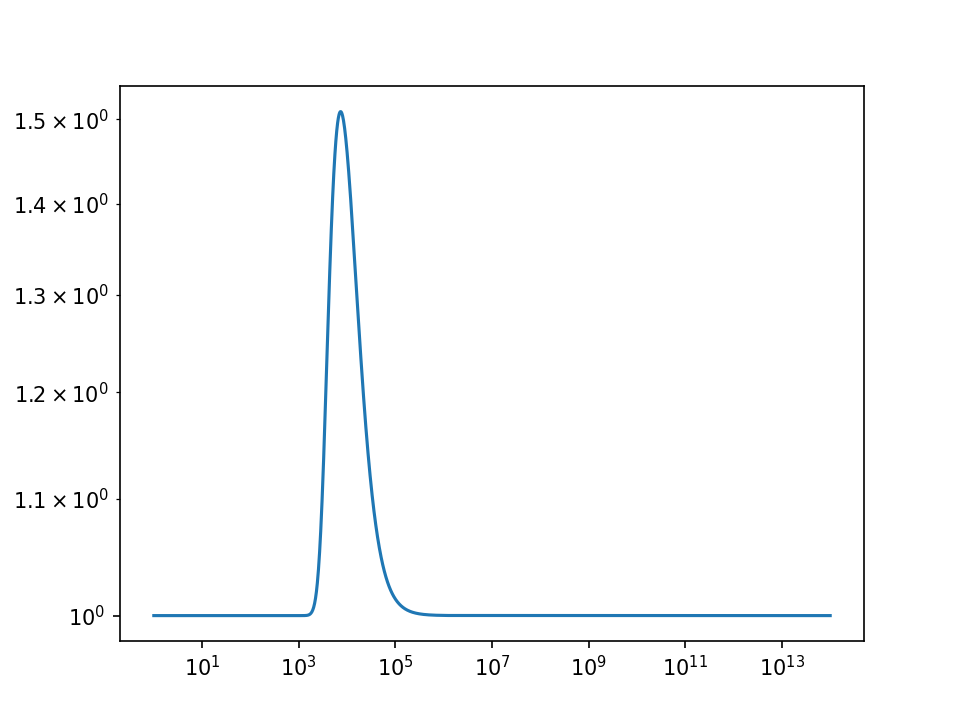

In [13]:
plt.figure()
#plt.loglog(1.+bg["z"],-bg["(.)drdlna_wzdr"]/(3.*(bg["(.)rho_wzdr"]+bg["(.)p_wzdr"])))
#plt.loglog(1.+bg["z"],-bg["(.)drdlna_wzdr"]/(3.*(bg["(.)rho_wzdr"]+bg["(.)p_wzdr"])))
plt.loglog(1.+bg["z"],bg["(.)extra_wzdr"]/bg["(.)rho_wzdr"])
plt.show()

<IPython.core.display.Javascript object>


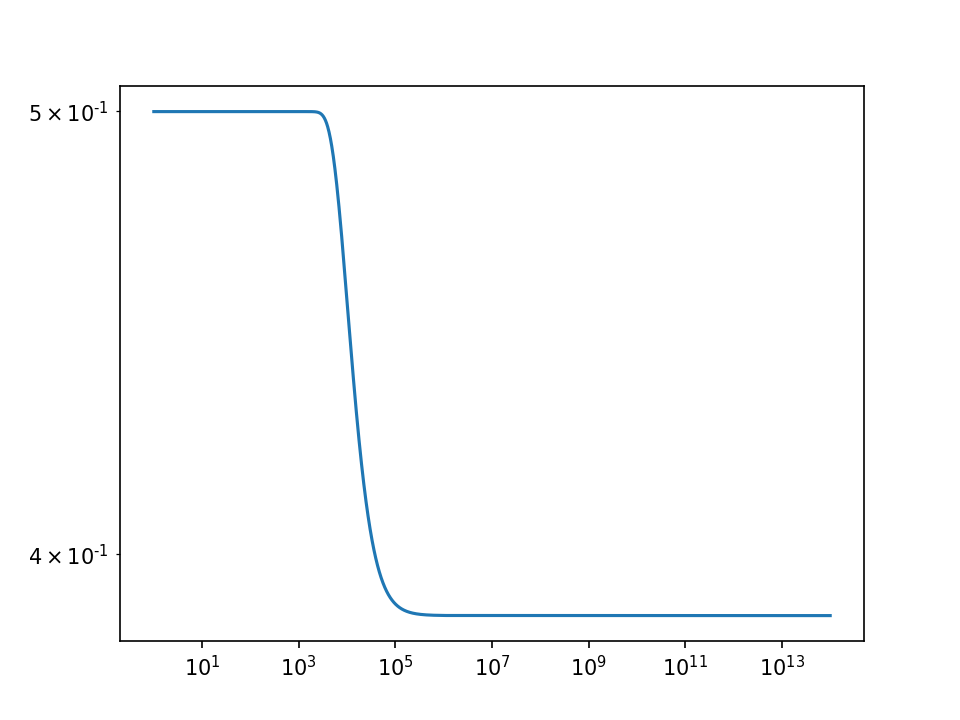

In [14]:
plt.figure()
plt.loglog(1.+bg["z"],bg["(.)N_wzdr"])
plt.show()

<IPython.core.display.Javascript object>


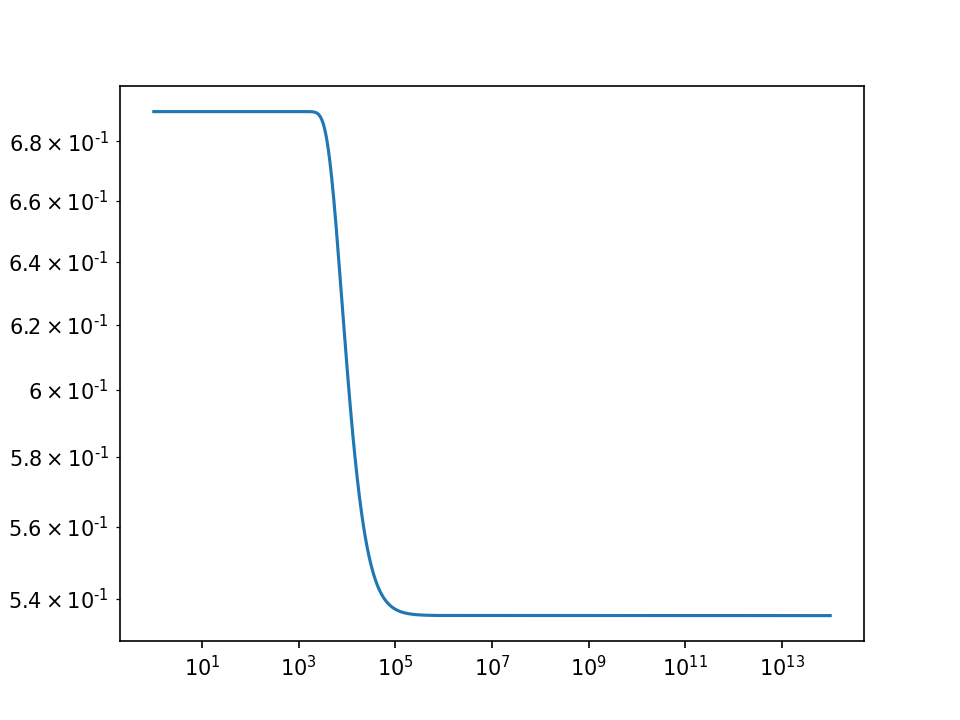

In [18]:
plt.figure()
plt.loglog(1.+bg["z"],bg["(.)T_wzdr"])
plt.show()

In [19]:
from copy import deepcopy
Yhe = 0.24
Ntot = 0.462192 + 0.133697

In [20]:

cosmo1 = classy.Class()

cosmo1.set(common_pars)
cosmo1.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**4.4})
#cosmo1.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.45),'use_wzdr_PSD':'yes'})


#cosmo.set({'tol_wzdr':1e-14})
cosmo1.set({'wzdr_integration_method':1,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-15,"YHe":Yhe})
cosmo1.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo1.compute()

bg1 = cosmo1.get_background()
cl1 = deepcopy(cosmo1.lensed_cl())

cosmo2 = classy.Class()

cosmo2.set(common_pars)
cosmo2.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':1e12,'use_wzdr_PSD':'yes'})

#cosmo.set({'tol_wzdr':1e-14})
cosmo2.set({'wzdr_integration_method':1,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-16,"YHe":Yhe})
cosmo2.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo2.compute()

bg2 = cosmo2.get_background()
cl2 = deepcopy(cosmo2.lensed_cl())


In [21]:
cosmo3 = classy.Class()

cosmo3.set(common_pars)
cosmo3.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**4.6,'use_wzdr_PSD':'yes'})

#cosmo.set({'tol_wzdr':1e-14})
cosmo3.set({'wzdr_integration_method':0,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-14,"YHe":Yhe})
cosmo3.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo3.compute()

bg3 = cosmo3.get_background()
cl3 = deepcopy(cosmo3.lensed_cl())

cosmo4 = classy.Class()

cosmo4.set(common_pars)
cosmo4.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**5.2,'use_wzdr_PSD':'yes'})

#cosmo.set({'tol_wzdr':1e-14})
cosmo4.set({'wzdr_integration_method':0,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-14,"YHe":Yhe})
cosmo4.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo4.compute()

bg4 = cosmo4.get_background()
cl4 = deepcopy(cosmo4.lensed_cl())

In [22]:
print(cosmo1.get_current_derived_parameters(["YHe"])["YHe"])
print(cosmo2.get_current_derived_parameters(["YHe"])["YHe"])

0.24
0.24


<IPython.core.display.Javascript object>


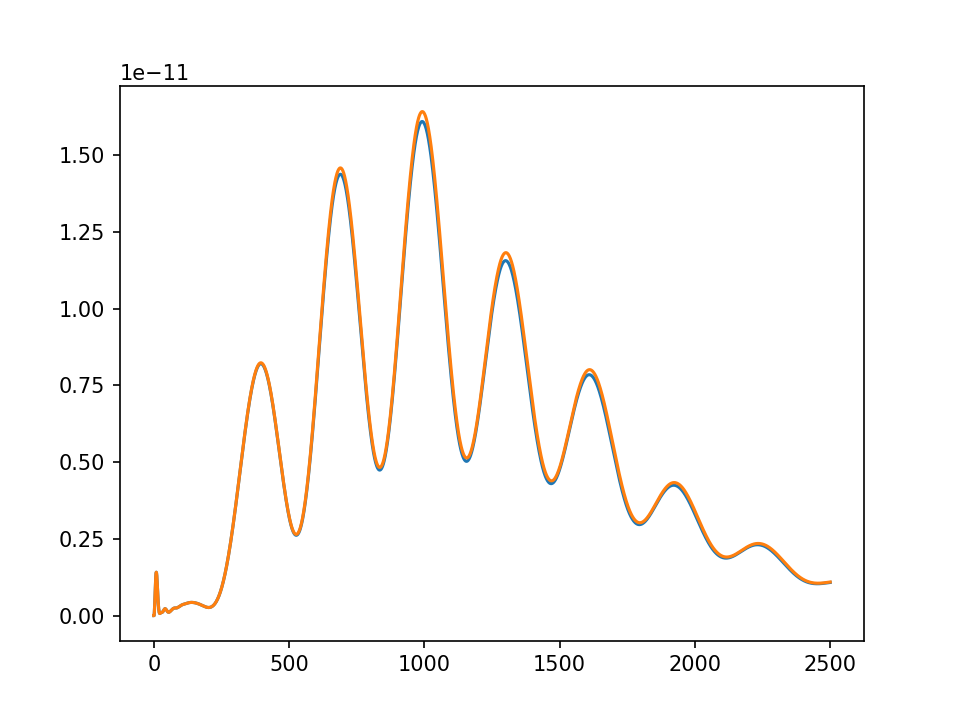

In [23]:
plt.figure()
plt.plot(cl1['ell'],cl1['ee']*cl1['ell']*(cl1['ell']+1))
plt.plot(cl2['ell'],cl2['ee']*cl2['ell']*(cl2['ell']+1))
plt.show()

<IPython.core.display.Javascript object>


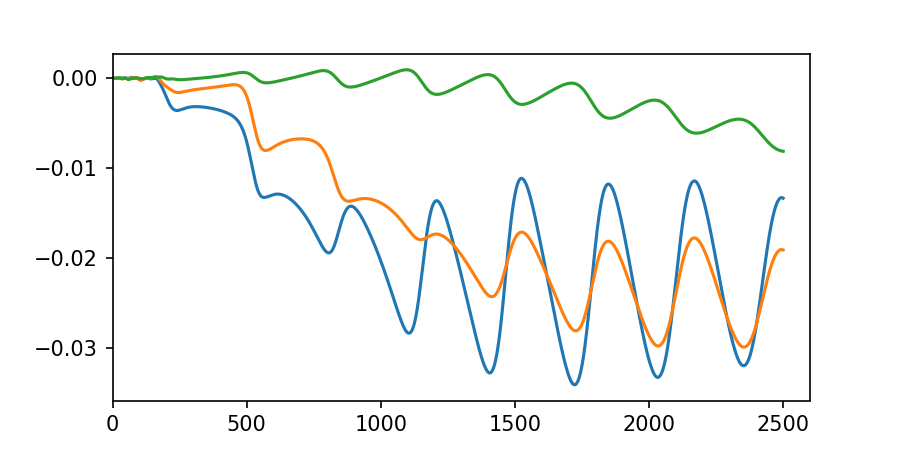

<ipython-input-24-c85fb1177a78>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],cl1[ttype]/cl2[ttype]-1)
<ipython-input-24-c85fb1177a78>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],cl3[ttype]/cl2[ttype]-1)
<ipython-input-24-c85fb1177a78>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],cl4[ttype]/cl2[ttype]-1)


In [24]:
plt.figure(figsize=(6,3))
ttype = 'ee'
plt.plot(cl1['ell'],cl1[ttype]/cl2[ttype]-1)
plt.plot(cl1['ell'],cl3[ttype]/cl2[ttype]-1)
plt.plot(cl1['ell'],cl4[ttype]/cl2[ttype]-1)
plt.gca().yaxis.set_major_locator(plticker.MultipleLocator(base=0.01))
plt.xlim(0,2600)
#plt.ylim(-0.035,0.002)
plt.savefig("fig2.pdf")
plt.show()

<IPython.core.display.Javascript object>


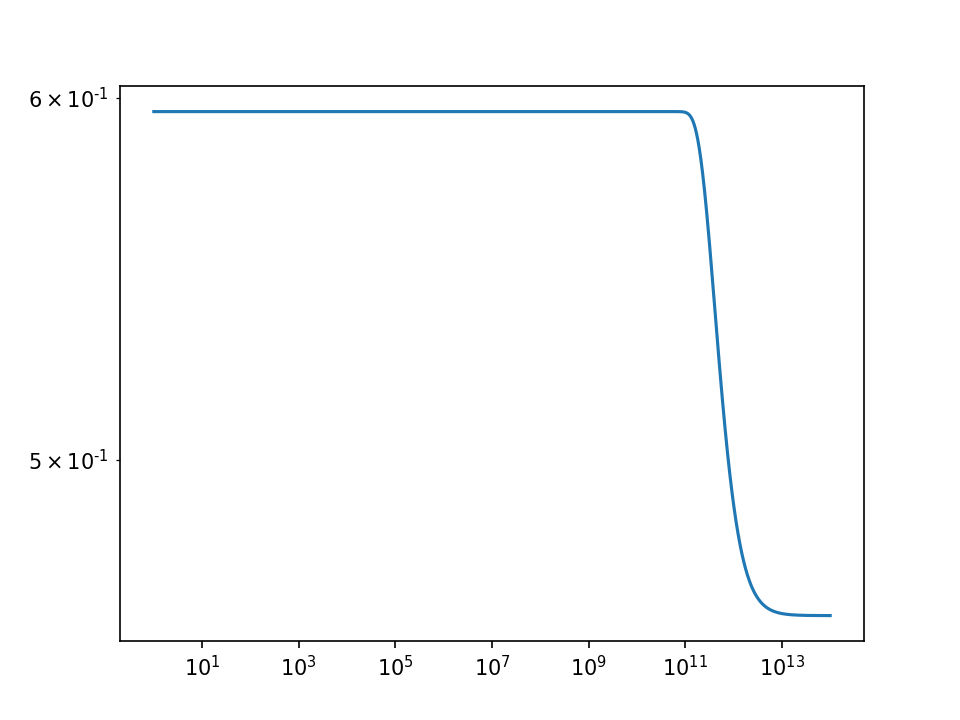

In [25]:
plt.figure()
plt.loglog(1.+bg2["z"],bg2["(.)N_wzdr"])
plt.show()

In [26]:
cosmo_noPSD = classy.Class()

cosmo_noPSD.set(common_pars)
#cosmo1.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.45)})
cosmo_noPSD.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.4)})


#cosmo.set({'tol_wzdr':1e-14})
cosmo_noPSD.set({'wzdr_integration_method':1,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-15,"YHe":Yhe,'use_wzdr_PSD':'no'})
cosmo_noPSD.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo_noPSD.compute()

bg_noPSD = cosmo_noPSD.get_background()
cl_noPSD = deepcopy(cosmo_noPSD.lensed_cl())

<IPython.core.display.Javascript object>


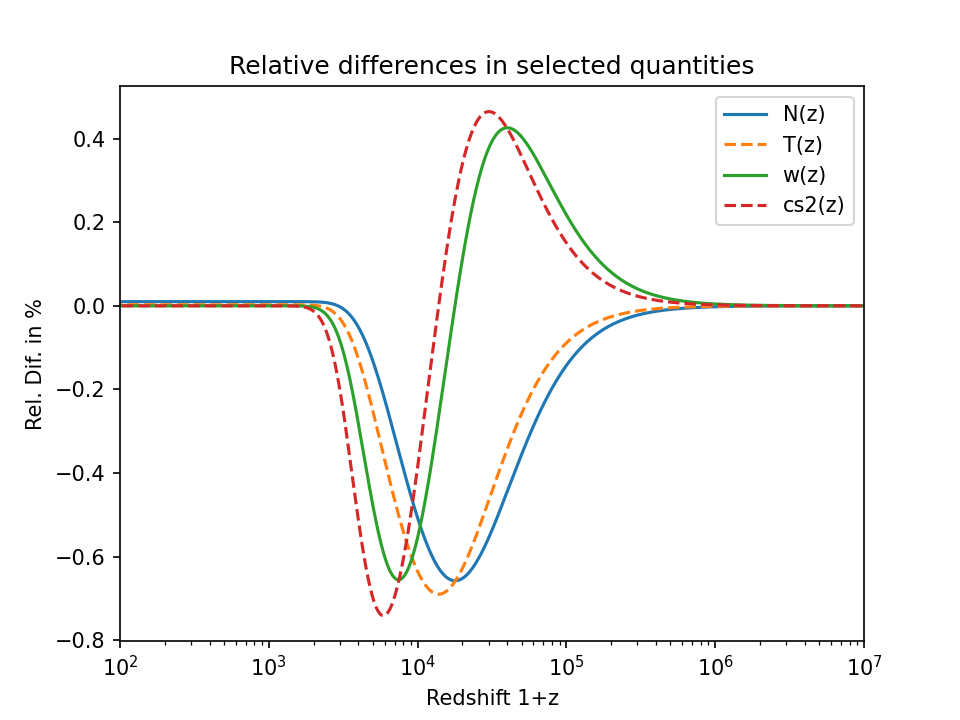

In [27]:
#
if np.all(bg_noPSD['z'] == bg1['z']):
    plt.figure()
    plt.semilogx(1.+bg1['z'],100.*(bg_noPSD['(.)N_wzdr']/bg1['(.)N_wzdr']-1),label="N(z)")
    plt.semilogx(1.+bg1['z'],100.*(bg_noPSD['(.)T_wzdr']/bg1['(.)T_wzdr']-1),label="T(z)",linestyle="--")
    plt.semilogx(1.+bg1['z'],100.*(bg_noPSD['(.)w_wzdr']/bg1['(.)w_wzdr']-1),label="w(z)")
    plt.semilogx(1.+bg1['z'],100.*(bg_noPSD['(.)cs2_wzdr']/bg1['(.)cs2_wzdr']-1),label="cs2(z)",linestyle="--")
    plt.xlim(1e2,1e7)
    plt.title("Relative differences in selected quantities")
    plt.ylabel("Rel. Dif. in %")
    plt.xlabel("Redshift 1+z")
    plt.legend()
    plt.savefig("Deviation_from_Bessel_BG.pdf")
    plt.show()

<IPython.core.display.Javascript object>


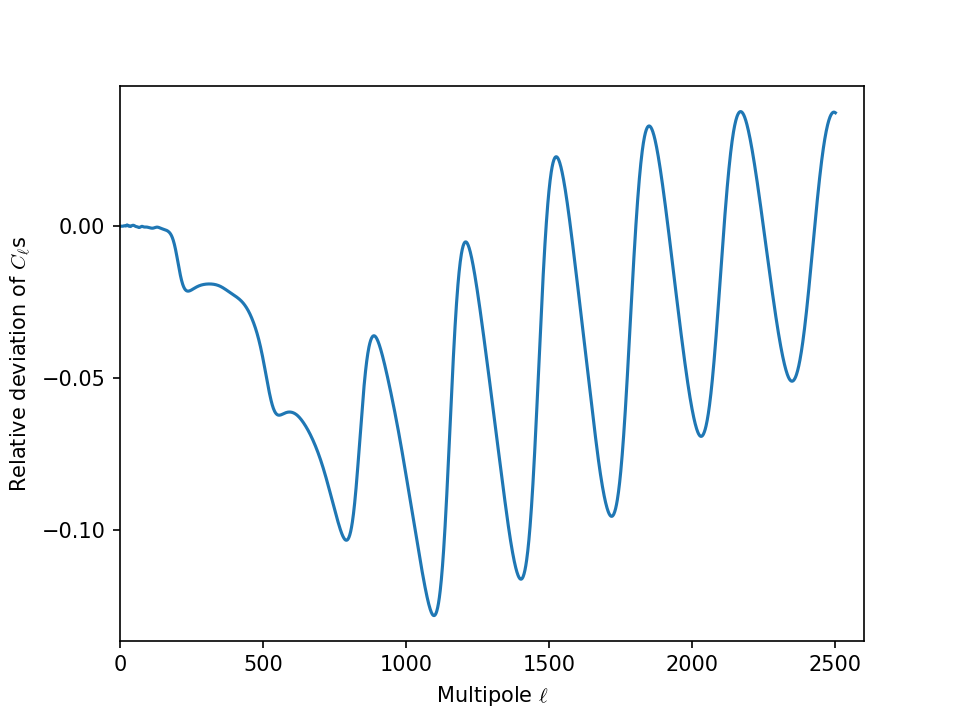

<ipython-input-28-858a723f3d81>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],100.*(cl_noPSD[ttype]/cl1[ttype]-1))


In [28]:
plt.figure()
ttype = 'ee'
plt.plot(cl1['ell'],100.*(cl_noPSD[ttype]/cl1[ttype]-1))
plt.gca().yaxis.set_major_locator(plticker.MultipleLocator(base=0.05))
plt.xlim(0,2600)
#plt.ylim(-0.005,0.005)
plt.ylabel(r"Relative deviation of $C_\ell$s")
plt.xlabel(r"Multipole $\ell$")
plt.savefig("Deviation_from_Bessel_CL.pdf")
#plt.savefig("compare.pdf")
plt.show()

<IPython.core.display.Javascript object>


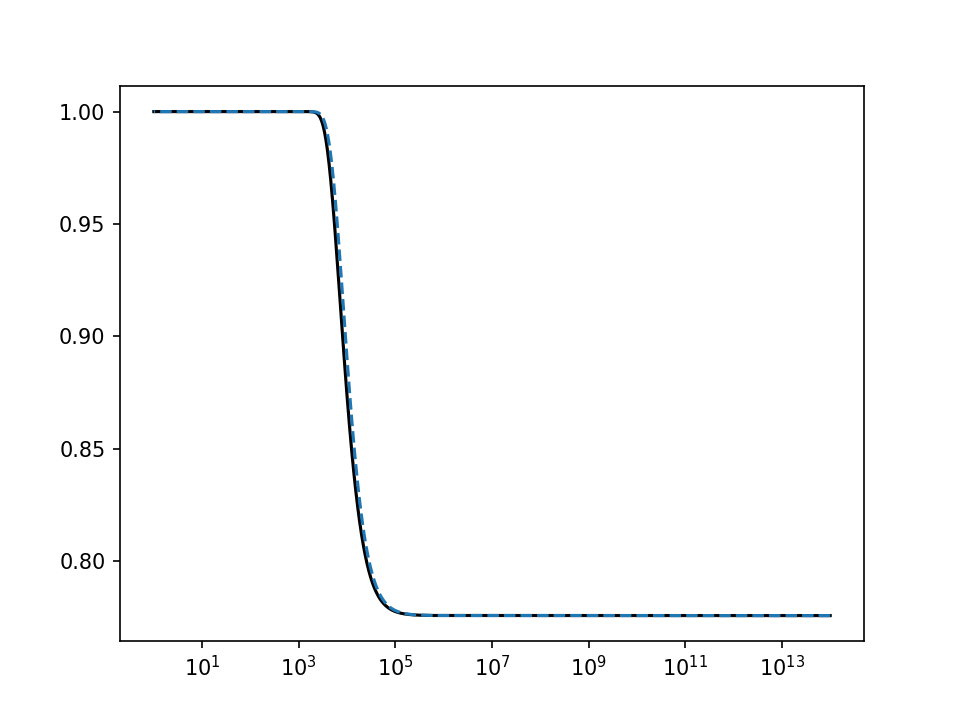

In [29]:
plt.figure()
from scipy.special import kn
def rhohat(x):
    return x*x/2.*kn(2,x) + x*x*x/6.*kn(1,x)
def Phat(x):
    return x*x/2.*kn(2,x)
T_true = bg_noPSD['(.)T_wzdr']/bg_noPSD['(.)T_wzdr'][-1]
plt.semilogx(1.+bg1['z'],T_true,label="T(z)",color="black")
m = 10**(4.45) * bg_noPSD['(.)T_wzdr'][-1]
x = m/bg_noPSD['(.)T_wzdr']/(1.+bg1['z'])
T_bess = 1./pow(1.+1.14285714286/4.*(3.*rhohat(x)+Phat(x)),1./3.)
plt.semilogx(1.+bg1['z'],T_bess,label="T(z) Bessel",linestyle="--")
plt.show()

<IPython.core.display.Javascript object>


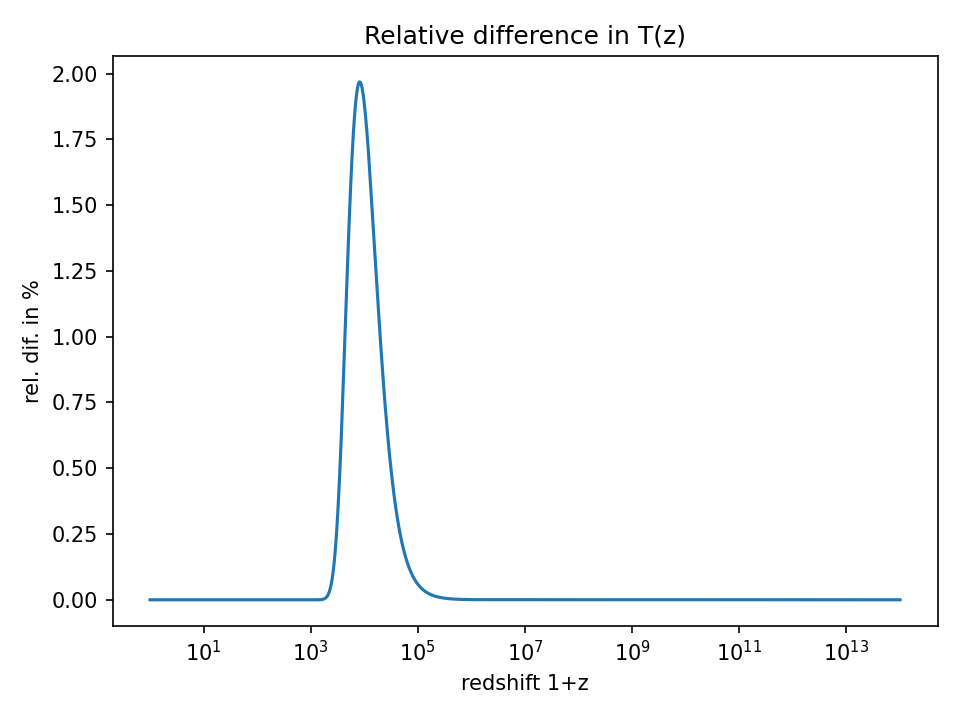

In [30]:
plt.figure()
plt.semilogx(1.+bg1['z'],100.*(T_bess/T_true-1),label="Difference T(z) real vs Bessel")
plt.xlabel("redshift 1+z")
plt.ylabel("rel. dif. in %")
plt.title("Relative difference in T(z)")
plt.tight_layout()
plt.savefig("Deviation_Bessel_T.pdf")
plt.show()

In [31]:
cosmo_MB = classy.Class()

cosmo_MB.set(common_pars)
#cosmo1.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.45)})
cosmo_MB.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.4)})


#cosmo.set({'tol_wzdr':1e-14})
cosmo_MB.set({'wzdr_integration_method':1,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-15,"YHe":Yhe,'use_wzdr_PSD':'yes','spinstat_wzdr':0})
cosmo_MB.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo_MB.compute()

bg_MB = cosmo_MB.get_background()
cl_MB = deepcopy(cosmo_MB.lensed_cl())

In [32]:
cosmo_FD = classy.Class()

cosmo_FD.set(common_pars)
#cosmo1.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.45)})
cosmo_FD.set({'N_wzdr':Ntot,'rg_wzdr':1.14285714286,'zt_wzdr':10**(4.4)})


#cosmo.set({'tol_wzdr':1e-14})
cosmo_FD.set({'wzdr_integration_method':1,'qsize_wzdr':5000,'qmax_wzdr':10.,'tol_wzdr':1e-15,"YHe":Yhe,'use_wzdr_PSD':'yes','spinstat_wzdr':1})
cosmo_FD.set({'output':'tCl,pCl,lCl','lensing':'yes'})
cosmo_FD.compute()

bg_FD = cosmo_FD.get_background()
cl_FD = deepcopy(cosmo_FD.lensed_cl())

<IPython.core.display.Javascript object>


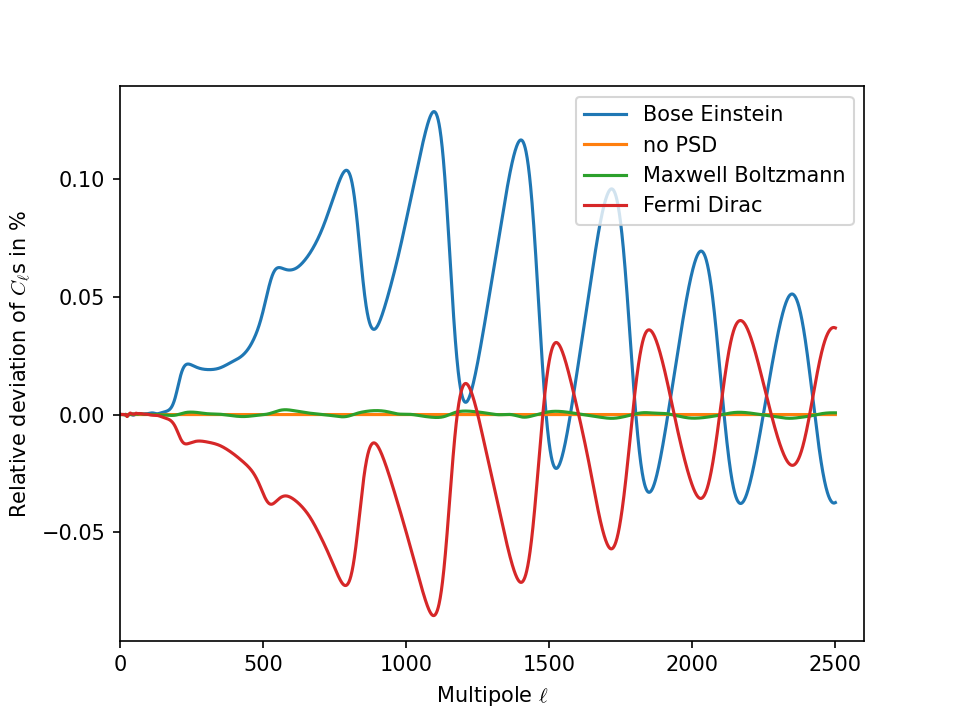

<ipython-input-36-005e723ae000>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],100.*(cl1[ttype]/cl_noPSD[ttype]-1),label="Bose Einstein")
<ipython-input-36-005e723ae000>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],100.*(cl_noPSD[ttype]/cl_noPSD[ttype]-1),label="no PSD")
<ipython-input-36-005e723ae000>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],100.*(cl_MB[ttype]/cl_noPSD[ttype]-1),label="Maxwell Boltzmann")
<ipython-input-36-005e723ae000>:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(cl1['ell'],100.*(cl_FD[ttype]/cl_noPSD[ttype]-1),label="Fermi Dirac")


In [36]:
plt.figure()
ttype = 'ee'
plt.plot(cl1['ell'],100.*(cl1[ttype]/cl_noPSD[ttype]-1),label="Bose Einstein")
plt.plot(cl1['ell'],100.*(cl_noPSD[ttype]/cl_noPSD[ttype]-1),label="no PSD")
plt.plot(cl1['ell'],100.*(cl_MB[ttype]/cl_noPSD[ttype]-1),label="Maxwell Boltzmann")
plt.plot(cl1['ell'],100.*(cl_FD[ttype]/cl_noPSD[ttype]-1),label="Fermi Dirac")
plt.gca().yaxis.set_major_locator(plticker.MultipleLocator(base=0.05))
plt.xlim(0,2600)
#plt.ylim(-0.005,0.005)
plt.ylabel(r"Relative deviation of $C_\ell$s in %")
plt.xlabel(r"Multipole $\ell$")
plt.legend()
plt.savefig("Deviation_from_Boson_CL.pdf")
#plt.savefig("compare.pdf")
plt.show()